**Plot RTM Results**

**Daniel Köhn**

**Kiel, 08/11/2016**

**Import necessary packages**

In [48]:
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
import scipy.ndimage.filters
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import hilbert
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pickle

**Activate different post-processing options**

In [49]:
ENVELOPE=0;
GAUSSIAN=0;

**FD grid dimensions **

In [50]:
DH = 4.0;
NX = 632;
NY = 328;

**Define Axis**

In [51]:
x = np.arange(0.0, DH*NX, DH)
y = np.arange(0.0, DH*NY, DH)

**Define fonts**

In [52]:
FSize = 20
font = {'color':  'black',
        'weight': 'bold',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 10, 12

**Read S-wave velocity model and RTM result**

In [53]:
f = open ('start/RTM_TTI_simple_true.denise.c11')
data_type = np.dtype ('float32').newbyteorder ('<')
vp = np.fromfile (f, dtype=data_type)
vp = vp.reshape(NX,NY)
vp = np.transpose(vp)
vp = np.flipud(vp)

In [54]:
f1 = open ('RTM_16_02_2017_TTI/jacobian_Test_P_image_TTI')
RTM = np.fromfile (f1, dtype=data_type)
RTM = RTM.reshape(NX,NY)
RTM = np.transpose(RTM)
RTM = np.flipud(RTM)
RTM = scipy.ndimage.filters.laplace(RTM) # suppress low-wavenumber artifacts in image 

**Scale RTM result with depth**

In [55]:
RTM_scale = np.zeros((NX,NY))
RTM_scale += np.flipud(y)**1
RTM*=RTM_scale.transpose()

**Apply Gaussian filter**

In [56]:
if(GAUSSIAN==1):
    RTM = gaussian_filter(RTM, sigma=[1,3])

**Calculate Envelope**

In [57]:
if(ENVELOPE==1):
    analytic_signal = hilbert(RTM,axis=-1)
    RTM = np.abs(analytic_signal)
    RTM = gaussian_filter(RTM, sigma=[3,1])

**Plot $\alpha$-Blending of Vp FWI result (Jet) and Laplace-filtered RTM result (Gray)**

In [58]:
def do_plot(n, an, title):
    ax=plt.subplot(1, 1, n)
    extent = [0.0,NX*DH/1000.0,0.0,NY*DH/1000.0]
    cmax = 5e11 # RTM simple true
    cmin = -cmax

    plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    plt.rc('text', usetex=True)

    if(n==1):
        im1 = plt.imshow(vp, cmap=plt.cm.jet, interpolation='nearest', extent=extent)
        plt.hold(True)

    im2 = plt.imshow(RTM, cmap=plt.cm.gray, alpha=.7, interpolation='bicubic',
                 extent=extent, vmin=cmin, vmax=cmax)

    a = gca()
    a.set_xticklabels(a.get_xticks(), font)
    a.set_yticklabels(a.get_yticks(), font)
    #plt.axis('scaled')
    plt.title(title, fontdict=font)
    plt.ylabel('Depth [km]', fontdict=font)
    plt.xlabel('Distance [km]', fontdict=font)
    plt.gca().invert_yaxis()
    plt.text(0.1, 0.1,an,fontdict=font,color='white')
    #cbar=plt.colorbar()
    #cbar.set_label('Vp[m/s]', fontdict=font, labelpad=1)

__Plot SubPlots__

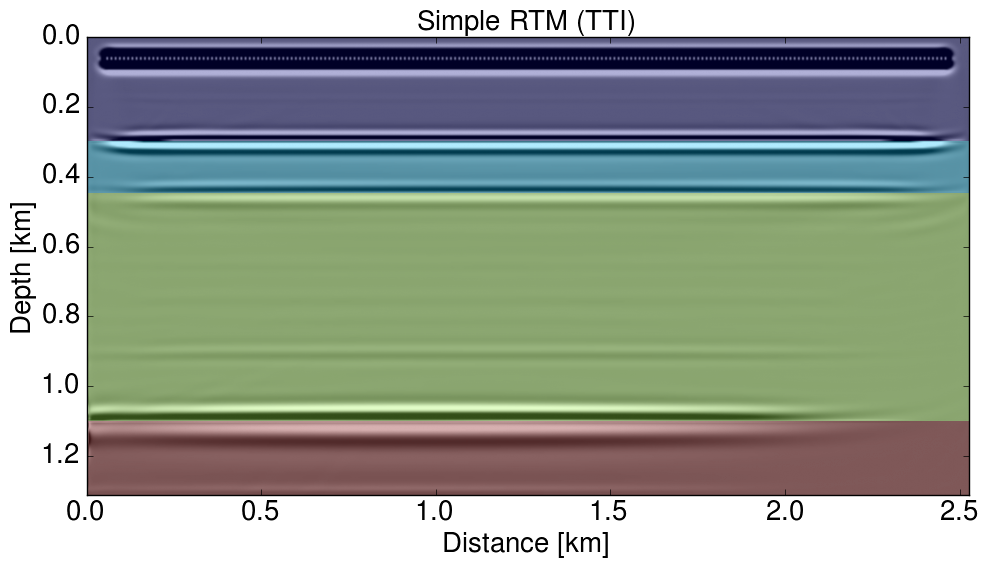

In [59]:
plt.close('all')
plt.figure()
do_plot(1, ' ', r"Simple RTM (TTI)")
#do_plot(2, '(b)', r" ")
#plt.savefig('RTM_TTI.png', bbox_inches='tight', format='png', dpi=100)
plt.savefig('RTM_TTI.pdf', bbox_inches='tight', format='pdf')
plt.tight_layout()
plt.show()